# Пример использования библиотеки TheoryGamesDL

В этом ноутбуке показано, как использовать библиотеку TheoryGamesDL для моделирования социальных дилемм и применения Q-обучения.

In [1]:
# Импортируем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
import json

# Импортируем компоненты нашей библиотеки
from theorygamesdl.models import SocialDilemma
from theorygamesdl.agents import sd_qlearning
from theorygamesdl.utils.simulation import simulate
from theorygamesdl.utils.encoders import NpEncoder

## Пример 1: Дилемма заключенного

Рассмотрим классическую дилемму заключенного с выплатами [3, 1, 0, 4].

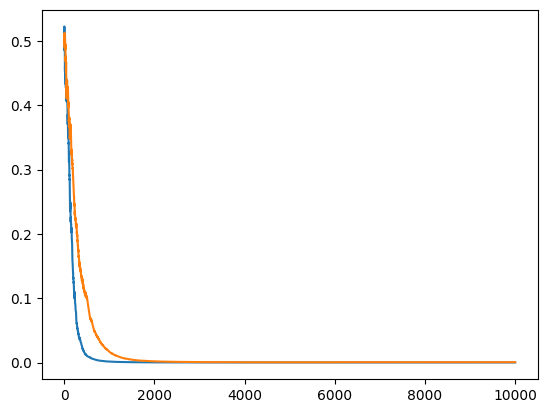

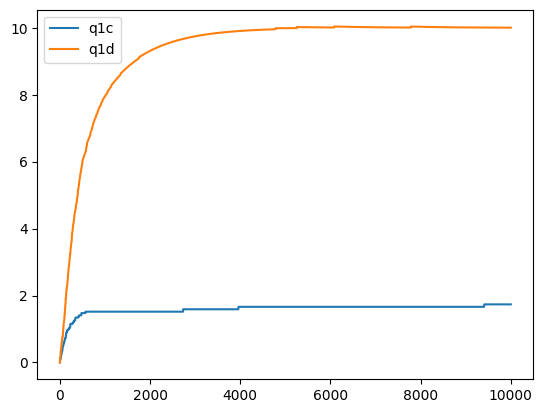

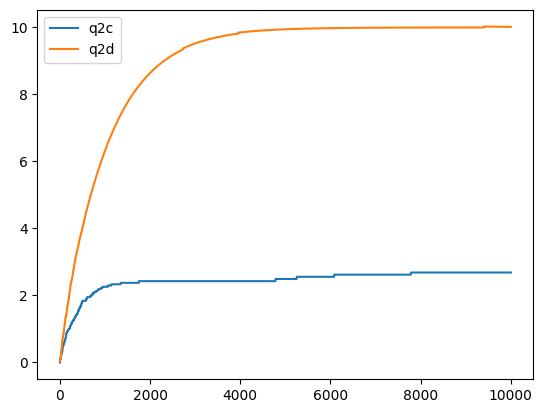

In [2]:
# Запускаем симуляцию дилеммы заключенного
pd_payoffs = [3, 1, 0, 4]  # Выплаты для дилеммы заключенного [CC, DD, DC, CD]
pol1_y1, pol2_y1, q1c, q1d, q2c, q2d, history, h_rew = simulate(
    pd=pd_payoffs, 
    time=10000,  # Количество эпизодов
    gamma=0.9,   # Коэффициент дисконтирования
    alpha=0.01,  # Скорость обучения
    beta=1,      # Параметр температуры для softmax-стратегии
    show_q=True  # Показывать графики Q-значений
)

## Пример 2: Охота на оленя

Теперь рассмотрим игру "Охота на оленя" (Stag Hunt).

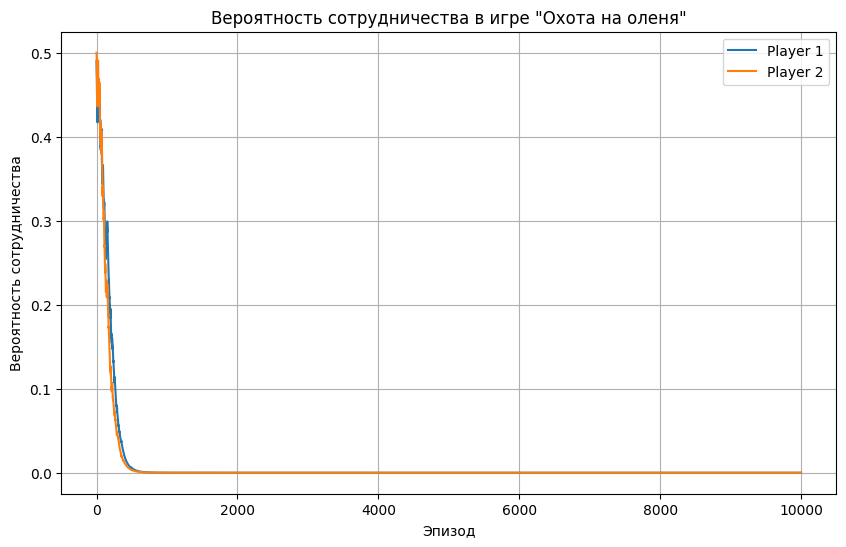

In [3]:
# Создаем игру "Охота на оленя"
sh_game = SocialDilemma(dilemma_type="sh", steps_number=1)

# Запускаем Q-обучение
pol1, pol2, payoff_matrix1, payoff_matrix2, errs, history, Q1, Q2, h_rew = sd_qlearning(
    sh_game, 
    episode_count=10000, 
    alpha=0.01, 
    gamma=0.9, 
    beta=1
)

# Преобразуем формат политик для анализа
pol1 = np.moveaxis(pol1, 0, 1)
pol2 = np.moveaxis(pol2, 0, 1)

# Извлекаем вероятности сотрудничества
pol1_y1 = [row[1] for row in pol1[0]]
pol2_y1 = [row[1] for row in pol2[0]]

# Визуализируем результаты
plt.figure(figsize=(10, 6))
plt.plot(pol1_y1, label='Player 1')
plt.plot(pol2_y1, label='Player 2')
plt.title('Вероятность сотрудничества в игре "Охота на оленя"')
plt.xlabel('Эпизод')
plt.ylabel('Вероятность сотрудничества')
plt.legend()
plt.grid(True)
plt.show()

## Пример 3: Сравнение разных типов дилемм

Сравним результаты обучения для разных типов социальных дилемм.

Запуск симуляции для pd...
Симуляция для pd завершена.
Запуск симуляции для sh...
Симуляция для sh завершена.
Запуск симуляции для ch...
Симуляция для ch завершена.
Запуск симуляции для bs...
Симуляция для bs завершена.


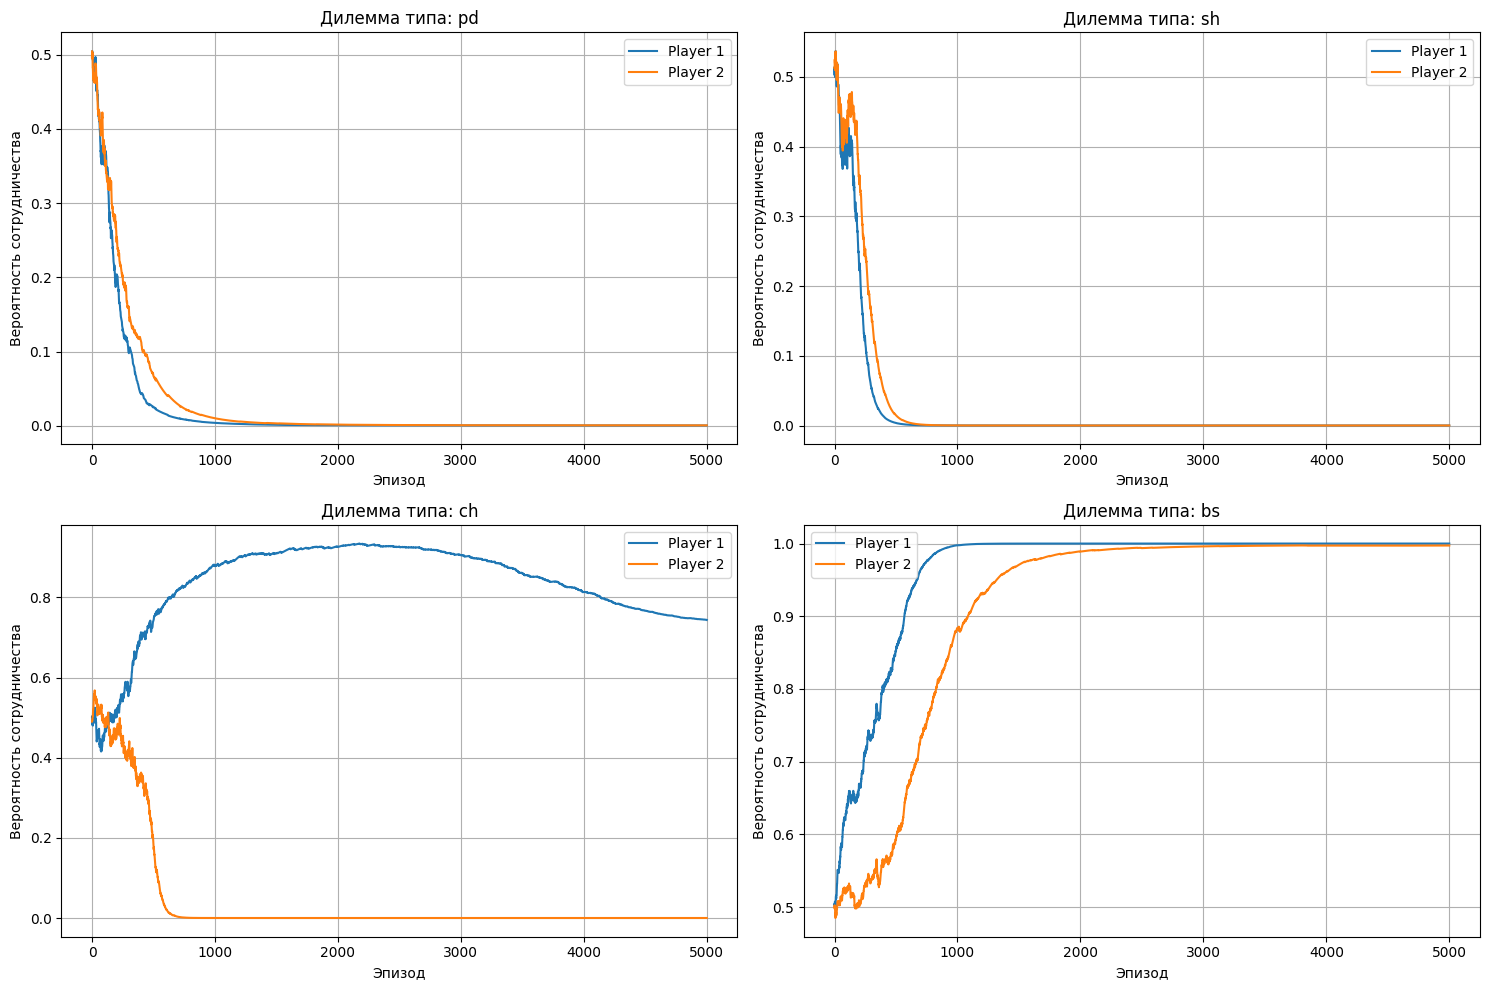

In [4]:
# Функция для запуска симуляции и получения результатов
def run_simulation(dilemma_type, episodes=5000):
    game = SocialDilemma(dilemma_type=dilemma_type, steps_number=1)
    pol1, pol2, payoff_matrix1, payoff_matrix2, errs, history, Q1, Q2, h_rew = sd_qlearning(
        game, episode_count=episodes, alpha=0.01, gamma=0.9, beta=1
    )
    
    # Преобразуем формат политик
    pol1 = np.moveaxis(pol1, 0, 1)
    pol2 = np.moveaxis(pol2, 0, 1)
    
    # Извлекаем вероятности сотрудничества
    pol1_y1 = [row[1] for row in pol1[0]]
    pol2_y1 = [row[1] for row in pol2[0]]
    
    return pol1_y1, pol2_y1

# Запускаем симуляции для разных типов дилемм
dilemma_types = ['pd', 'sh', 'ch', 'bs']
results = {}

for dilemma_type in dilemma_types:
    print(f"Запуск симуляции для {dilemma_type}...")
    pol1_y1, pol2_y1 = run_simulation(dilemma_type)
    results[dilemma_type] = {'player1': pol1_y1, 'player2': pol2_y1}
    print(f"Симуляция для {dilemma_type} завершена.")

# Визуализируем результаты
plt.figure(figsize=(15, 10))

for i, dilemma_type in enumerate(dilemma_types):
    plt.subplot(2, 2, i+1)
    plt.plot(results[dilemma_type]['player1'], label='Player 1')
    plt.plot(results[dilemma_type]['player2'], label='Player 2')
    plt.title(f'Дилемма типа: {dilemma_type}')
    plt.xlabel('Эпизод')
    plt.ylabel('Вероятность сотрудничества')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

## Сохранение результатов

Можно сохранить результаты симуляции для дальнейшего анализа.

In [5]:
# Сохраняем результаты в JSON
with open('simulation_results.json', 'w') as f:
    json.dump(results, f, cls=NpEncoder)

print("Результаты сохранены в файл simulation_results.json")

Результаты сохранены в файл simulation_results.json
